nr of spikes: 0


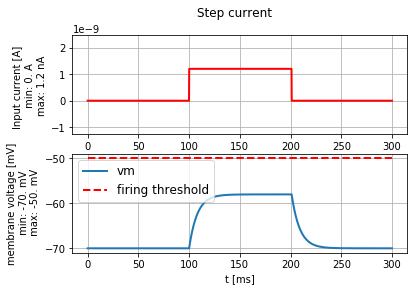

nr of spikes: 5


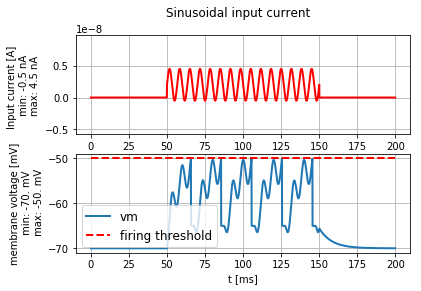

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [1]:
  %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools


LIF.getting_started()
LIF.print_default_parameters()

### 2.1.1. Question: minimal current (calculation)

In [2]:
I_THRESHOLD = (LIF.FIRING_THRESHOLD - LIF.V_REST) / (LIF.MEMBRANE_RESISTANCE)
print("minimal current: {}".format(I_THRESHOLD))

minimal current: 2. nA


### 2.1.2. Question: minimal current (simulation)

Use the value i_min you’ve computed and verify your result: inject a step current of amplitude i_min for 100ms into the LIF neuron and plot the membrane voltage. Vm should approach the firing threshold but not fire. We have implemented a couple of helper functions to solve this task. Use this code block, but make sure you understand it and you’ve read the docs of the functions LIF.simulate_LIF_neuron(), input_factory.get_step_current() and plot_tools.plot_voltage_and_current_traces().

nr of spikes: 0


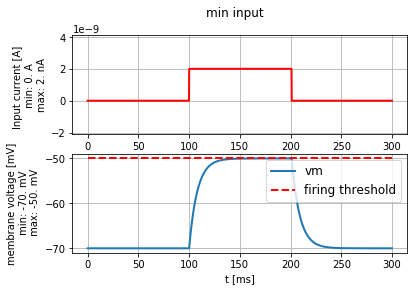

In [3]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=100, t_end=200, unit_time=b2.ms,
    amplitude= I_THRESHOLD)  # multiply by (1+epsilon) for numerical approximation

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 300 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0



## 2.2. Exercise: f-I Curve

For a constant input current I, a LIF neuron fires regularly with firing frequency f. If the current is to small (I < I_min) f is 0Hz; for larger I the rate increases. A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

### 2.2.1. Question: f-I Curve and refractoryness

We now study the f-I curve for a neuron with a refractory period of 3ms (see LIF.simulate_LIF_neuron() to learn how to set a refractory period).

<ol>
    <li>Sketch the f-I curve you expect to see</li>
    <li>What is the maximum rate at which this neuron can fire?</li>
    <li>Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.</li>
</ol>



In [4]:
def get_freq_reponse(I):
    step_current = input_factory.get_step_current(
        t_start=0, t_end=500, unit_time=b2.ms,
        amplitude= I)

    # run the LIF model.
    # Note: As we do not specify any model parameters, the simulation runs with the default values
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 300 * b2.ms)
    
    n_spikes = spike_monitor.count[0]
    if n_spikes == 0:
        return 0. * b2.Hz
    else:
        return n_spikes / (500 * b2.ms)


Missing compiler_cxx fix for MSVCCompiler


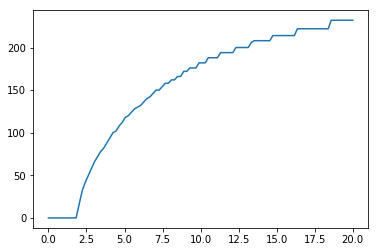

In [5]:
currents = np.linspace(0, 20, 100)
frequencies = np.zeros(currents.shape)

for (i, I) in enumerate(currents):
    frequencies[i] = get_freq_reponse(I  * b2.nA)

plt.plot(currents, frequencies)

## 2.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

A LIF neuron is determined by the following parameters: Resting potential, Reset voltage, Firing threshold, Membrane resistance, Membrane time-scale, Absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.
### 2.3.1. Question: “Read” the LIF parameters out of the vm plot

<ol>
    <li>Get a random parameter set</li>
    <li>Create an input current of your choice.</li>
    <li>Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.</li>
    <li>Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the Membrane resistance and the Membrane time-scale you might have to change your current.</li>
    <li>compare your estimates with the true values.</li>
</ol>

Again, you do not have to write much code. Use the helper functions:

(<matplotlib.axes._subplots.AxesSubplot at 0xb7b0208>,
 <matplotlib.axes._subplots.AxesSubplot at 0xba39588>)

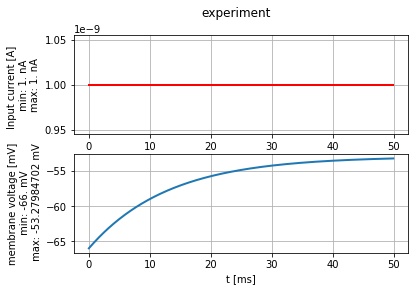

In [11]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=0, t_end=50, unit_time=b2.ms, amplitude= 1 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

Resting potential is at $$U_{rest} = -66.00mV$$

$$R=\frac{U_\infty - E_{Rest}}{I_\infty}=\frac{(-53-(-66))\cdot 10^{-3}}{10^{-9}}=13\mu\Omega$$

Expected values:

In [21]:
E_rest = state_monitor.v[0, 0]
U_Inf = state_monitor.v[0, -1]
I0 = 1 * b2.namp
R = (U_Inf - E_rest) / (I0)
i1 = 0
i2 = 20
di = 20

V = state_monitor.v
T = state_monitor.t

Tau = (T[i2] - T[i1]) / np.log((V[0, i2] - V[0, i2 + di]) / (V[0, i1] - V[0, i1 + di]))

print("E_Rest = {}".format(E_rest))
print("U_Inf = {}".format(U_Inf))
print("R = {}".format(R))
print("Tau = {}".format(Tau))

E_Rest = -66. mV
U_Inf = -53.27984702 mV
R = 12.72015298 Mohm
Tau = -13. ms


In [22]:
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -66. mV
Reset voltage: -63. mV
Firing threshold: -38. mV
Membrane resistance: 13. Mohm
Membrane time-scale: 13. ms
Absolute refractory period: 5. ms


## 2.4. Exercise: Sinusoidal input current and subthreshold response

In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.
### 2.4.1. Question

Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 0


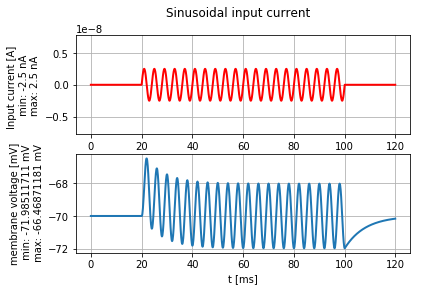

In [23]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [67]:
def amp_phase(f):
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                                amplitude= 2.5 * b2.namp, frequency=f*b2.Hz,
                                                direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)



    V = state_monitor.v[0, 500:1000]
    T = state_monitor.t

    AV0 = (np.max(V) - np.min(V)) / 2

    I = sinusoidal_current.values[500:1000, 0]
    AI0 = (np.max(I) - np.min(I)) / 2

    V0 = np.mean(V)
    I0 = np.mean(I)
    plt.plot(V, I)
    plt.show()

    x = np.asarray(np.correlate(V - V0, I - I0) / (AV0 * AI0))
    print(x)
    a = np.arccos(x)
    return (AV0, a)

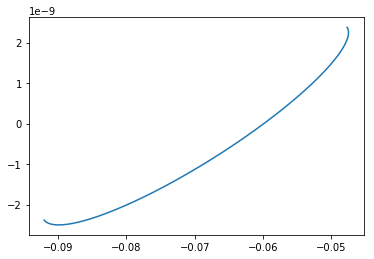

WARNING    C:\Users\Urvan\AppData\Local\conda\conda\envs\bmnn\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in arccos
 [py.warnings]


[ 239.93815866]


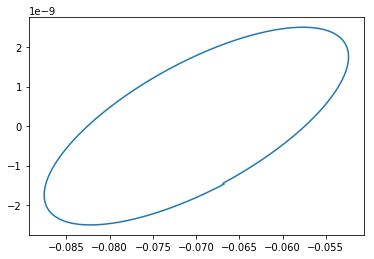

[ 174.50010384]


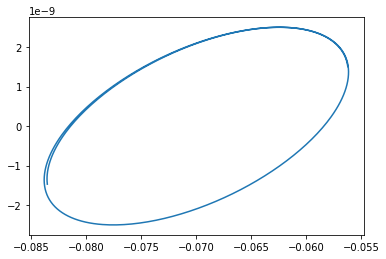

[ 137.19674118]


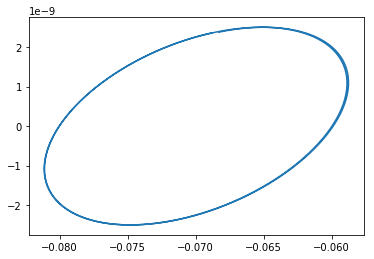

[ 108.4911177]


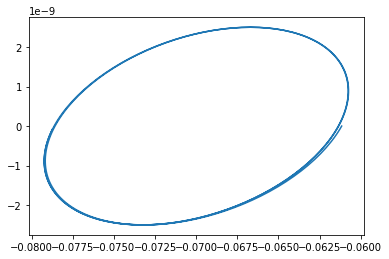

[ 85.53902131]


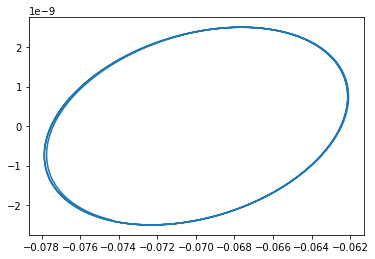

[ 73.97297762]


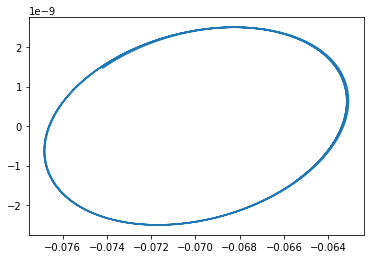

[ 60.44069467]


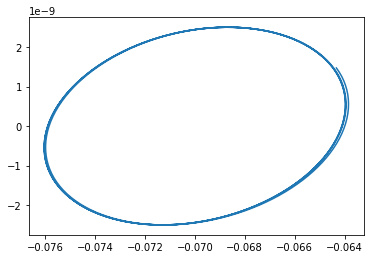

[ 53.38291952]


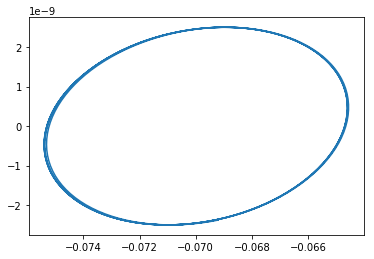

[ 45.85814783]


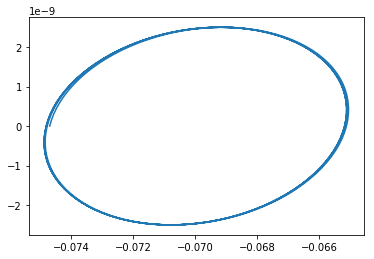

[ 41.13958]


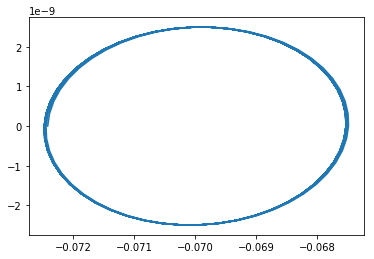

[ 9.17410985]


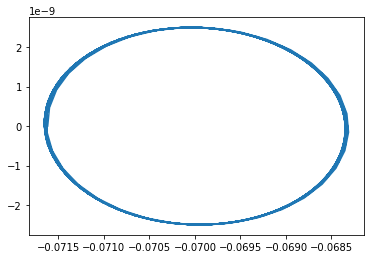

[-6.87083056]


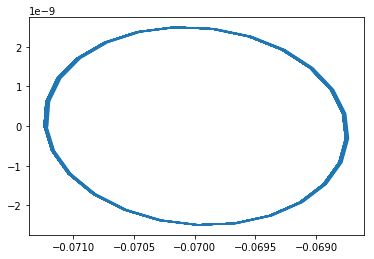

[-18.83602468]


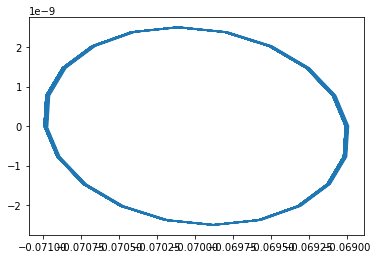

[-29.17050141]


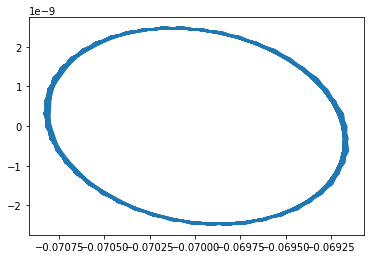

[-38.49292581]


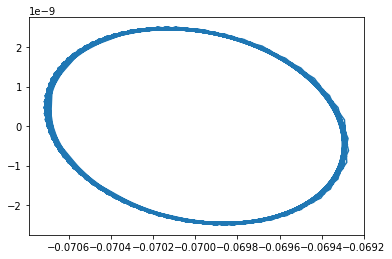

[-47.27374952]


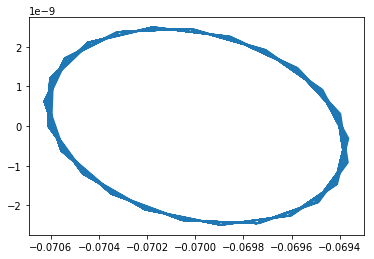

[-55.97570969]


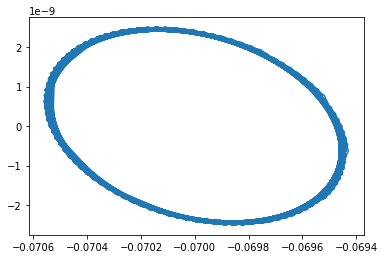

[-63.86180163]


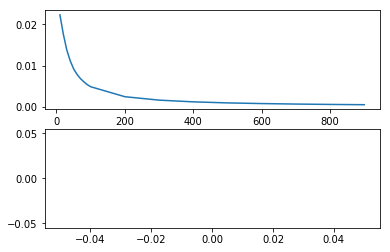

In [68]:
Fs = [10*i for i in range(1, 10)] + [100*i for i in range(1, 10)]
As = [amp_phase(f) for f in Fs]
Amps = [a[0] for a in As]
Phases = [a[1] for a in As]

f, ax = plt.subplots(nrows=2)
ax[0].plot(Fs, Amps)
ax[1].plot(Fs, Phases)
plt.show()